<a href="https://colab.research.google.com/github/MarcianoPazinatto/analise_de_dados_covid_2019/blob/main/Covid_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Dados Covid-2019

### Importando bibliotecas


In [60]:
import pandas as pd
import numpy as np
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go
import re 
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

### Lendo arquivo do DataFrame

In [61]:
url = 'https://github.com/MarcianoPazinatto/analise_de_dados_covid_2019/blob/main/covid_19_data.csv?raw=true'

df = pd.read_csv(url, parse_dates=['ObservationDate', 'Last Update'])
df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
26708,26709,2020-05-19,Wyoming,US,2020-05-20 02:32:19,776.0,10.0,0.0
26709,26710,2020-05-19,Xinjiang,Mainland China,2020-05-20 02:32:19,76.0,3.0,73.0
26710,26711,2020-05-19,Yukon,Canada,2020-05-20 02:32:19,11.0,0.0,11.0
26711,26712,2020-05-19,Yunnan,Mainland China,2020-05-20 02:32:19,185.0,2.0,183.0


In [62]:
### Fomatando Colunas - não devem ter letras maiúsculas e caracteres especiais.

In [63]:
def corrige_colunas(col):
  return re.sub(r"[/| ]", "", col).lower()

In [64]:
df.columns = [corrige_colunas(col) for col in df.columns]

In [65]:
df

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
26708,26709,2020-05-19,Wyoming,US,2020-05-20 02:32:19,776.0,10.0,0.0
26709,26710,2020-05-19,Xinjiang,Mainland China,2020-05-20 02:32:19,76.0,3.0,73.0
26710,26711,2020-05-19,Yukon,Canada,2020-05-20 02:32:19,11.0,0.0,11.0
26711,26712,2020-05-19,Yunnan,Mainland China,2020-05-20 02:32:19,185.0,2.0,183.0


### Selecionando dados do Brasil

<p>Vizualizar os Países</p>

In [66]:
df.countryregion.unique()

array(['Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Japan',
       'Thailand', 'South Korea', 'Singapore', 'Philippines', 'Malaysia',
       'Vietnam', 'Australia', 'Mexico', 'Brazil', 'Colombia', 'France',
       'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast',
       'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy',
       'UK', 'Russia', 'Sweden', 'Spain', 'Belgium', 'Others', 'Egypt',
       'Iran', 'Israel', 'Lebanon', 'Iraq', 'Oman', 'Afghanistan',
       'Bahrain', 'Kuwait', 'Austria', 'Algeria', 'Croatia',
       'Switzerland', 'Pakistan', 'Georgia', 'Greece', 'North Macedonia',
       'Norway', 'Romania', 'Denmark', 'Estonia', 'Netherlands',
       'San Marino', ' Azerbaijan', 'Belarus', 'Iceland', 'Lithuania',
       'New Zealand', 'Nigeria', 'North Ireland', 'Ireland', 'Luxembourg',
       'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan', 'Czech Republic',
       'Armenia', 'Dominican Republic', 'Indonesia', 'Portugal',
       'Andorra', 'Latvia

#### Selecionando o Brasil

In [67]:
df.loc[df.countryregion == "Brazil"]

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered
82,83,2020-01-23,NaN,Brazil,2020-01-23 17:00:00,0.0,0.0,0.0
2455,2456,2020-02-26,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2559,2560,2020-02-27,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2668,2669,2020-02-28,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2776,2777,2020-02-29,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...
24850,24851,2020-05-15,NaN,Brazil,2020-05-16 02:32:19,220291.0,14962.0,84970.0
25227,25228,2020-05-16,NaN,Brazil,2020-05-17 02:32:32,233511.0,15662.0,89672.0
25604,25605,2020-05-17,NaN,Brazil,2020-05-18 02:32:21,241080.0,16118.0,94122.0
25981,25982,2020-05-18,NaN,Brazil,2020-05-19 02:32:18,255368.0,16853.0,100459.0


#### Casol confirmados no Brasil

In [68]:
brasil = df.loc[(df.countryregion == "Brazil") &
       (df.confirmed > 0)]

Graficos da Evolução de casos confirmados

In [69]:
px.line(brasil, 'observationdate', 'confirmed', title='Casos confirmados no Brasil Covid-2019')

Novos casos por dia

In [70]:
brasil['novoscasos'] = list(map(
    lambda x: 0 if (x==0) else brasil['confirmed'].iloc[x] - brasil['confirmed'].iloc[x-1],
    np.arange(brasil.shape[0])
))

C:\Users\Marciano\AppData\Local\Temp\ipykernel_532\1429085487.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [71]:
px.line(brasil, x='observationdate', y='novoscasos', title='Novos casos por dia')

###Mortes

In [72]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(x=brasil.observationdate, y=brasil.deaths, name='Mortes',
               mode='lines+markers', line={'color': 'red'})
)

fig.update_layout(title='Mortes por COVID-2019 no Brasil')
fig.show()


####Taxa de crescimento

In [73]:
def taxa_crescimento(dados, variavel, data_inicio=None, data_fim=None):
    if data_inicio == None:
        data_inicio = dados.observationdate.loc[dados[variavel] > 0].min()
    else:
        data_inicio = pd.to_datetime(data_inicio)
    
    if data_fim == None:
        data_fim = dados.observationdate.iloc[-1]
    else:
        data_fim = pd.to_datetime(data_fim)
        
    # Define os valores do presente e passado    
    passado = dados.loc[dados.observationdate == data_inicio, variavel].values[0]
    presente = dados.loc[dados.observationdate == data_fim, variavel].values[0]
    
    # Define o número de pontos no tempo que vai ser avaliado
    n = (data_fim - data_inicio).days
    
    # Calcular a taxa
    taxa = (presente/passado)**(1/n) - 1
    
    return taxa*100

#### Taxa de crescimento médio do COVID-2019 no Brasil em todo o periodo


In [74]:
taxa_crescimento(brasil, 'confirmed')

16.27183353112116

In [75]:
def taxa_crescimento_diaria(dados, variavel, data_inicio=None):
    if data_inicio == None:
        data_inicio = dados.observationdate.loc[dados[variavel] > 0].min()
    else:
        data_inicio = pd.to_datetime(data_inicio)
        
    data_fim = dados.observationdate.max()
    
    # Define o número de pontos no tempo que vai ser avaliado
    n = (data_fim - data_inicio).days
    
    #Taxa calculada de um dia para o outro
    taxas = list(map(
        lambda x: (dados[variavel].iloc[x] - dados[variavel].iloc[x-1]) / dados[variavel].iloc[x-1],
        range(1, n+1)
    ))
    return np.array(taxas) * 100

In [76]:
tx_dia = taxa_crescimento_diaria(brasil, 'confirmed')

In [77]:
tx_dia

array([  0.        ,   0.        , 100.        ,   0.        ,
         0.        ,   0.        , 100.        ,   0.        ,
       225.        ,   0.        ,  53.84615385,  25.        ,
        24.        ,  22.58064516,  36.84210526, 190.38461538,
         0.        ,   7.28476821,  23.45679012,  60.5       ,
        15.88785047,  66.93548387,  27.69726248,  28.75157629,
        51.4201763 ,  24.45019405,  16.78794179,  13.66266133,
        16.87548943,  14.47236181,  14.25226807,   9.01639344,
         7.58928571,  24.8525879 ,  19.57320273,  17.67115272,
        12.58080557,  14.39929329,   7.43243243,   9.26325247,
        15.40169394,  15.22017956,  11.88620903,   8.54521335,
         5.54537122,   7.06807546,   5.57858688,   7.81903542,
        12.10513815,   7.4329096 ,  10.70501233,   8.83557983,
         5.44492335,   5.4043566 ,   5.73350023,   6.21648599,
         9.35157462,   8.00823407,   9.77184834,   6.36504619,
         6.88748019,   8.58316283,   8.80726429,   9.41

In [78]:
primeiro_dia = brasil.observationdate.loc[brasil.confirmed >0].min(0)

px.line(x=pd.date_range(primeiro_dia, brasil.observationdate.max())[1:],
        y=tx_dia, title='Taxa de crescimento de casos confirmados no Brasil')

###Predições

###Predições de confirmações de contagio de COVID-19

In [79]:
confirmados = brasil.confirmed
confirmados.index = brasil.observationdate
confirmados

observationdate
2020-02-26         1.0
2020-02-27         1.0
2020-02-28         1.0
2020-02-29         2.0
2020-03-01         2.0
                ...   
2020-05-15    220291.0
2020-05-16    233511.0
2020-05-17    241080.0
2020-05-18    255368.0
2020-05-19    271885.0
Name: confirmed, Length: 84, dtype: float64

In [80]:
res = seasonal_decompose(confirmados)

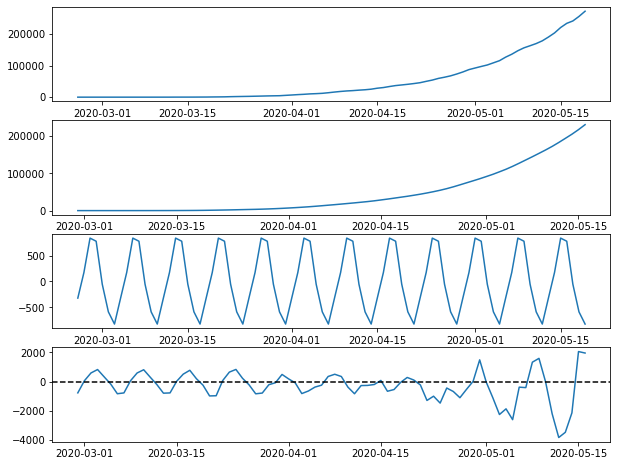

In [81]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10,8))

ax1.plot(res.observed)
ax2.plot(res.trend)
ax3.plot(res.seasonal)
ax4.plot(confirmados.index, res.resid)
ax4.axhline(0, linestyle='dashed', c='black')
plt.show()    

####Predições de MORTE por COVID-19

In [82]:
mortes = brasil.deaths
mortes.index = brasil.observationdate
mortes

observationdate
2020-02-26        0.0
2020-02-27        0.0
2020-02-28        0.0
2020-02-29        0.0
2020-03-01        0.0
               ...   
2020-05-15    14962.0
2020-05-16    15662.0
2020-05-17    16118.0
2020-05-18    16853.0
2020-05-19    17983.0
Name: deaths, Length: 84, dtype: float64

In [83]:
res = seasonal_decompose(mortes)

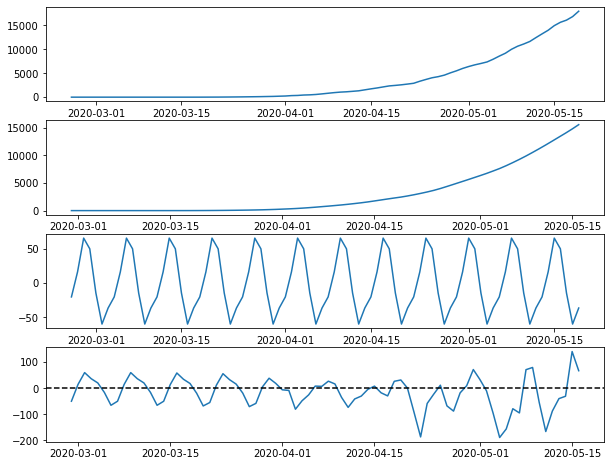

In [84]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10,8))

ax1.plot(res.observed)
ax2.plot(res.trend)
ax3.plot(res.seasonal)
ax4.plot(mortes.index, res.resid)
ax4.axhline(0, linestyle='dashed', c='black')
plt.show()            

In [85]:
!pip install pmdarima

In [86]:
from pmdarima.arima import auto_arima
modelo = auto_arima(confirmados)

In [87]:
fig = go.Figure(go.Scatter(
    x=confirmados.index, y=confirmados, name='Observados'
))

fig.add_trace(go.Scatter(
    x=confirmados.index, y=modelo.predict_in_sample(), name='Preditos'
))

fig.add_trace(go.Scatter(
    x=pd.date_range('2020-05-20', '2020-06-20'), y=modelo.predict(31), name='Forecast'
))

fig.update_layout(title='Previsão de casos confirmados no Brasil para os próximos 30 dias')
fig.show()

In [88]:
modelo = auto_arima(mortes)

fig = go.Figure(go.Scatter(
    x=mortes.index, y=mortes, name='Observados'
))

fig.add_trace(go.Scatter(
    x=mortes.index, y=modelo.predict_in_sample(), name='Preditos'
))

fig.add_trace(go.Scatter(
    x=pd.date_range('2020-05-20', '2020-06-30'), y=modelo.predict(31), name='Forecast'
))

fig.update_layout(title='Previsão de mortes no Brasil para os próximos 30 dias')
fig.show()